# OCVX

In [21]:
import numpy as np
from scipy.optimize import minimize

## 1. Descente de gradient sans contrainte
### Question 1-1
#### 1) Construire des familles de fonctions qui ont des nombres de conditionnements quelconques $\left(\ge 1\right)$
La famille de fonction choisie est la suivante: $f(x_1, x_2) = ax_1^2 + x_2^2$ avec $a\ge1$<br\>
En effet, la hessienne de cette fonction est la suivante: $\left(\begin{array}{cc} 
2a & 0\\
0 & 2
\end{array}\right)$ <br\>
Le nombre de condictionnements de la fonction est donc égal à $a$. <br\>
Nous pouvons ainsi générer facilement des fonctions de la même famille ayant un nombre de conditionnement que l'on fixe.
#### 2) Tracer le nombre d'itérations d'une descente de gradient à pas constant, contre le nombre de conditionnement d'une même famille de fonction

In [12]:
# hessian for ax1^2 + bx2^2
def hessian(x):
    return np.array([[2 * x[0], 0],
                     [0 , 2 * x[1]]])

In [13]:
objectives = [(np.array([i, 1.0]), np.linalg.cond(hessian([i, 1.0]))) for i in range(1, 10)]

In [14]:
def gradient_descentL2(A, lr = 0.1):
    x = np.array([1.0, 1.0])
    it = 0
    while x[0] > 0.00001 and x[1] > 0.00001:
        dx0 = 2 * A[0] * x[0]
        dx1 = 2 * A[1] * x[1]
        x[0] -= lr * dx0
        x[1] -= lr * dx1
        it += 1
    return it

In [15]:
resl2 = np.array([[x[1], gradient_descentL2(x[0], 0.1)] for x in objectives])

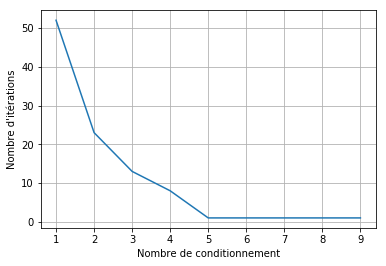

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resl2[:,0], resl2[:,1])
ax.set(xlabel='Nombre de conditionnement', ylabel='Nombre d\'itérations',
       title='')
ax.grid()
plt.show()

#### 3) Effectuez l'étude précédente pour différents pas

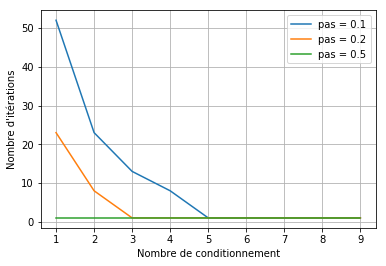

In [32]:
import matplotlib.pyplot as plt

res2 = np.array([[x[1], gradient_descentL2(x[0], 0.1)] for x in objectives])
res3 = np.array([[x[1], gradient_descentL2(x[0], 0.2)] for x in objectives])
res4 = np.array([[x[1], gradient_descentL2(x[0], 0.5)] for x in objectives])
fig, ax = plt.subplots()

ax.plot(res2[:,0], res2[:,1], label='pas = 0.1')
ax.plot(res3[:,0], res3[:,1], label='pas = 0.2')
ax.plot(res4[:,0], res4[:,1], label='pas = 0.5')

ax.set(xlabel='Nombre de conditionnement', ylabel='Nombre d\'itérations',
       title='')
ax.grid()
plt.legend()
plt.show()

### Question 1-2 Comparer les descentes de gradient en norme l1 et en norme l2

Une descente de gradient en norme l1 est une descente de gradient où l'on ne met à jours que la variable avec le  gradient le plus fort alors que dans une descente de gradient en norme l2, on mets à jours toutes les variables.

In [33]:
# Implementation d'une descente de gradient en norme l1
def gradient_descentL1(A, lr = 0.1):
    x = np.array([1.0, 1.0])
    it = 0
    while x[0] > 0.00001 and x[1] > 0.00001:
        dx0 = 2 * A[0] * x[0]
        dx1 = 2 * A[1] * x[1]
        
        if x[0] > x[1]:
            x[0] -= lr * dx0
        else:
            x[1] -= lr * dx1
        it += 1
    return it

In [34]:
resl1 = np.array([[x[1], gradient_descentL1(x[0], 0.03)] for x in objectives])

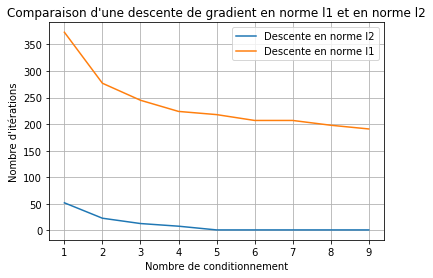

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resl2[:,0], resl2[:,1], label='Descente en norme l2')
ax.plot(resl1[:,0], resl1[:,1], label='Descente en norme l1')
ax.set(xlabel='Nombre de conditionnement', ylabel='Nombre d\'itérations',
       title='Comparaison d\'une descente de gradient en norme l1 et en norme l2')
ax.grid()
plt.legend()
plt.show()

On observe ici que la descente de gradient en norme l2 est bien plus rapide que la descente de gradient en norme l1. <br\>
### Question 1-3 Procéder de même en comparant l'une des deux descente précédentes à celle de la descente de gradient stochastique. Pour quelle raison nous ne l'avons pas abordé en cours?
La descente de gradient stochastique est une méthode utilisé pour optimiser une fonction objective décrite comme une somme de fonction de fonction. Au lieu d'optimiser la fonction objective, on optimise individuellement les sous fonctions, qui sous forme de somme sont égale à la fonction objective. <br\>
Si l'on prend la fonction suivante<br\>
$f(x) = ax^2 + x^2$<br\>
$f(x) = f_1(x) + f_2(x)$ avec<br\>
$f_1(x) = ax^2$ et $f_2(x) = x^2$<br\>
Dans notre problème l'application de la descente de gradient stochastique reviendrait à chaque itération de la descente de gradient à optimiser $f_1(x)$ puis à otimiser $f_2(x)$

In [50]:
def stochastique_gradient_descent(A, lr = 0.1):
    x = 1.0
    it = 0
    while x > 0.00001:
        # Optimisation de f1(x)
        dx0 = 2 * A[0] * x
        x -= lr * dx0
        
        # Optimisation de f2(x)
        dx1 = 2 * A[1] * x
        x -= lr * dx1
        
        it += 1
    return it * 2

In [51]:
res_t = np.array([[x[1], stochastique_gradient_descent(x[0], 0.1)] for x in objectives])

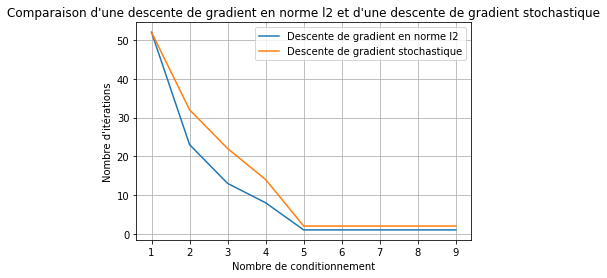

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resl2[:,0], resl2[:,1], label='Descente de gradient en norme l2')
ax.plot(res_t[:,0], res_t[:,1], label='Descente de gradient stochastique')
ax.set(xlabel='Nombre de conditionnement', ylabel='Nombre d\'itérations',
       title='Comparaison d\'une descente de gradient en norme l2 et d\'une descente de gradient stochastique')
ax.grid()
plt.legend()
plt.show()

La descente de gradient stochastique est une technique très uilisé dans les réseaux de neurone. Elle est généralement plus lente à converger mais permet de converger vers un meilleur minimum local car elle permet de sauter des minimums locaux présents près de l'initialisation. Nous ne l'avons pas abordé en cours car ce cours est un cours d'optimisation convexe où nous sommes toujours sur d'arriver vers un minimum local.